# Question 2: Finite Difference Method

Given the second order differential equation function.

$$ \frac{d^2y}{dx^2} = f(x, y , \frac{dy}{dx} )$$
$$ \frac{d^2y}{dx^2} = y'' = 6x - \frac{1}{2}x^2 $$

The Boundary value problem:

$$ y(0) = 0, \ and \ y(12) = 0 $$

The step size $h=4$ the actual $y(x)$ is unknown, we wish to find $y(4)$.

$$ y'' = \frac{y_{n+1} - 2y_n + y_{n-1}}{h^2}  \quad \ (from \ central \ difference) (1) $$
$$ y' = \frac{y_{n+1} - y_n}{h} \ quad \ (From \ Forward \ Euler) \ (2) $$



So using (1) we get:

$$ \frac{y_{n+1} - 2y_n + y_{n-1}}{h^2} = 6x_n - \frac{1}{2}x_n^2  \quad (3)$$

We are using $h=4$, so (3) becomes,

$$ y_{n+1} - 2y_n + y_{n-1} = 96x_n - 8x_n^2  \quad (4)$$

$$y_0 = 0$$                
$$y_2 - 2y_1 + y_0 = 256$$ 
$$y_3 -2y_2 + y_1 = 256$$
$$y_3 = 0$$


$$
\begin{equation*}
\begin{bmatrix}
1 & 0 & 0 & 0 \\
1 & -2 & 1 & 0 \\
0 & 1 & -2 & 1 \\
0 & 0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
y_0 \\
y_1 \\
y_2 \\
y_3 
\end{bmatrix}
= \begin{bmatrix}
0 \\
256  \\
256 \\
0
\end{bmatrix}
\end{equation*}
$$




In [9]:
## Library
import numpy as np
import math 

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings

warnings.filterwarnings("ignore")
class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

## Discrete Interval 
Here we will use a step sizes on the  $ 0 \leq x \leq 12 $.
### Interval
The step Size will be $h_{1} = 4

with the discrete time steps,
$$ x_{i} = 0 + 4i $$
for  $i=0,1,...,3$.



4


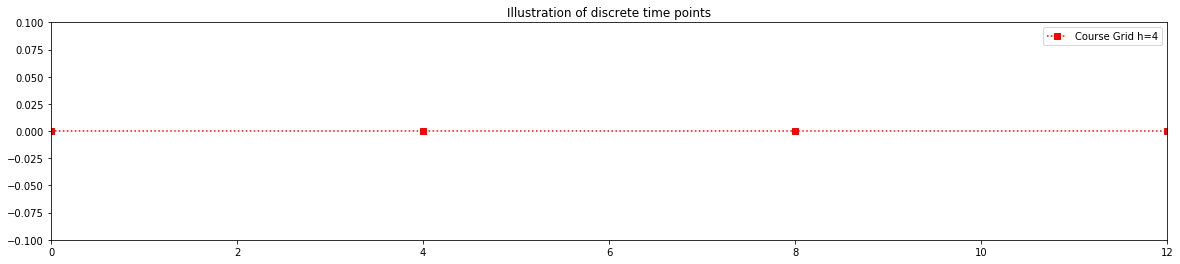

In [17]:
# Start and end of interval
b=12
a=0

N1=3

h1=int((b-a)/N1)
print(h1)

x1=np.arange(a,b+h1,h1)


fig = plt.figure(figsize=(20,4))
plt.plot(x1,0*x1,'s:',color='red',label='Course Grid h=%s'%(h1))


plt.xlim((0,12))
plt.ylim((-0.1,0.1))
plt.title('Illustration of discrete time points')
plt.legend()
plt.show()

In [18]:
def myfun_b(x,h):
    return (h**2*(6*x - 0.5*x**2))

def myfun_A(size, b0, bn, y0, y1, y2 ):
    A = np.zeros(shape=(size+1,size+1))
    A[0][0] = b0
    A[size][size] = bn
    for i in range(1,size):
        A[i][i-1] = y0
        A[i][i] = y1
        A[i][i+1] = y2
    return A

[[ 1.  0.  0.  0.]
 [ 1. -2.  1.  0.]
 [ 0.  1. -2.  1.]
 [ 0.  0.  0.  1.]]
[  0. 256. 256.   0.]


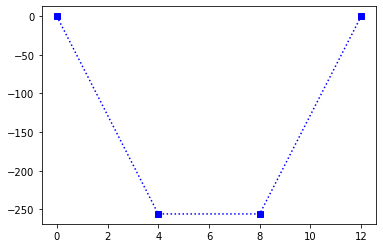

In [22]:

A = myfun_A(N1, 1, 1, 1, -2, 1 )
print(A)
b = np.zeros(N1+1)

for i in range (1,N1):
    b[i] = myfun_b(x1[i], h1)
print(b)
y_numerical = np.linalg.solve(A, b)
plt.plot(x1,y_numerical,'s:',color='blue',label='Course Grid h=%s'%(h1))


In [24]:
table = ListTable()
table.append(['x', 'y_numerical'
              ])
tableSize = N1
for i in range (0,tableSize+1):
    table.append([round(x1[i],5), round(y_numerical[i],5)])
    
table

x,y_numerical
0,0.0
4,-256.0
8,-256.0
12,0.0
